#**Deep Learning Homework 3: Convolutional Neural Networks**

### MSc Computer Science, Data Science, Cybersecurity @UniPD
### 2nd semester - 6 ECTS
### Prof. Nicolò Navarin & Prof. Alessandro Sperduti
---
In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the CIFAR-10 dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

np.random.seed(42)

###Load dataset:
### Load Data: CIFAR-10 dataset


We will use the CIFAR-10 dataset.The dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each sample is a 32x32 pixels color image, associated with a label from 10 classes:

```
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
```

Each pixel intensity is represented by a `uint8` (byte) from 0 to 255.
We will divide the dataset in training, testing and validation set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one and in color images is 3). Therefore, if you are using grayscale images use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims#:~:text=Used%20in%20the%20notebooks,-Used%20in%20the&text=This%20operation%20is%20useful%20to,to%20a%20tensor%20of%20scalars) to transform each image from a matrix to a 3-dimensional tensor. Finally, we have to normalize the input data.

In [3]:
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training


# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


170508288/170498071 [==============================] - 3s 0us/step


Let's take a look at a sample of the images in the dataset:

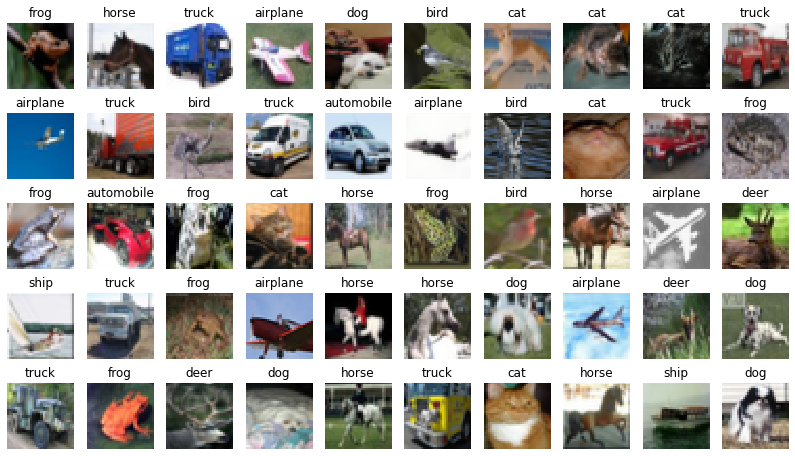

In [4]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [5]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)


mean = np.mean(X_train, axis = 0)
std = np.std(X_train, axis = 0)

X_train = (X_train - mean)/std  
X_valid = (X_valid - mean)/std  
X_test = (X_test - mean)/std


#Add one dimension to manage the channel if you are using grayscale images.
#X_train=tf.expand_dims(X_train, 3) 
#X_valid=tf.expand_dims(X_valid, 3) 
#X_test=tf.expand_dims(X_test,3)





#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [19]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


Print the model summary

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [20]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 2s 5ms/step - loss: 1.4547 - accuracy: 0.4907 - val_loss: 1.2342 - val_accuracy: 0.5652
Epoch 2/10
352/352 [==============================] - 2s 4ms/step - loss: 1.1506 - accuracy: 0.6028 - val_loss: 1.0998 - val_accuracy: 0.6198
Epoch 3/10
352/352 [==============================] - 2s 4ms/step - loss: 1.0337 - accuracy: 0.6448 - val_loss: 1.0624 - val_accuracy: 0.6330
Epoch 4/10
352/352 [==============================] - 2s 4ms/step - loss: 0.9589 - accuracy: 0.6712 - val_loss: 1.0330 - val_accuracy: 0.6442
Epoch 5/10
352/352 [==============================] - 2s 4ms/step - loss: 0.9056 - accuracy: 0.6908 - val_loss: 1.0393 - val_accuracy: 0.6486
Epoch 6/10
352/352 [==============================] - 2s 4ms/step - loss: 0.8601 - accuracy: 0.7056 - val_loss: 1.0192 - val_accuracy: 0.6616
Epoch 7/10
352/352 [==============================] - 2s 4ms/step - loss: 0.8254 - accuracy: 0.7170 - val_loss: 1.0129 - val_accuracy: 0.6550
Epoch 

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 1s - loss: 1.0679 - accuracy: 0.6451 - 630ms/epoch - 2ms/step
accuracy: 64.51%


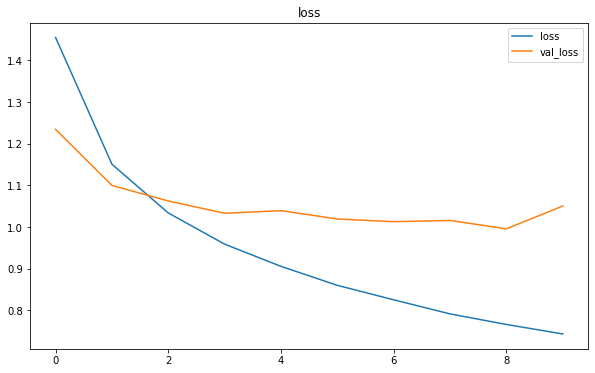

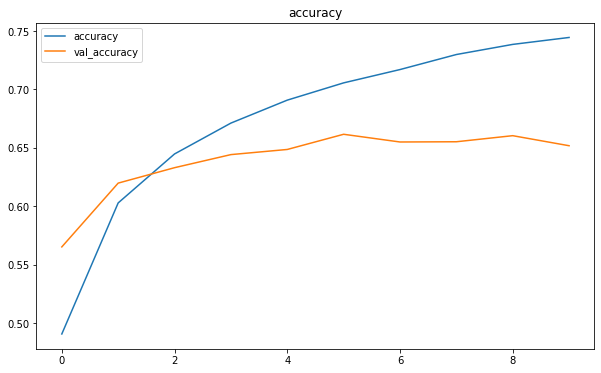

In [21]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

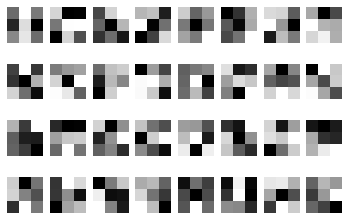

In [10]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   [TO COMPLETE] Answer to question 1: The number of parameters in each conv2d layers depends on: 1- the size of batchs(kernel) = X*X , 2&3- the number of input = If and output = Of  filters/features we make (in the last excersice Of was 32), and  4- finally the resulte sum to the number of neurons because we consider a bias term for each neuron so the 1 in formula corisponding that. So we have: $$ (X * X * If + 1 ) * Of $$ Which in first layer we have: $$ X = 3, If = 3, Of = 32 $$ so we have 896 parameters.
2.   [TO COMPLETE] Answer to question 2: To answer this, we have to search between the factors mentioned in the previous question their batch sizes are diffrent, the number of input and output feautures are different, and of course because of the diffrence in output features, the number of bias term are also diffrent

Let's now train our deep CNN.

Epoch 1/10
352/352 [==============================] - 2s 7ms/step - loss: 0.7346 - accuracy: 0.7498 - val_loss: 1.0815 - val_accuracy: 0.6470
Epoch 2/10
352/352 [==============================] - 2s 7ms/step - loss: 0.7047 - accuracy: 0.7585 - val_loss: 1.0509 - val_accuracy: 0.6544
Epoch 3/10
352/352 [==============================] - 3s 8ms/step - loss: 0.6842 - accuracy: 0.7659 - val_loss: 1.0661 - val_accuracy: 0.6512
Epoch 4/10
352/352 [==============================] - 3s 8ms/step - loss: 0.6644 - accuracy: 0.7739 - val_loss: 1.0503 - val_accuracy: 0.6550
Epoch 5/10
352/352 [==============================] - 2s 5ms/step - loss: 0.6480 - accuracy: 0.7793 - val_loss: 1.0566 - val_accuracy: 0.6530
Epoch 6/10
352/352 [==============================] - 2s 4ms/step - loss: 0.6270 - accuracy: 0.7860 - val_loss: 1.0673 - val_accuracy: 0.6584
Epoch 7/10
352/352 [==============================] - 2s 4ms/step - loss: 0.6089 - accuracy: 0.7928 - val_loss: 1.0969 - val_accuracy: 0.6502
Epoch 

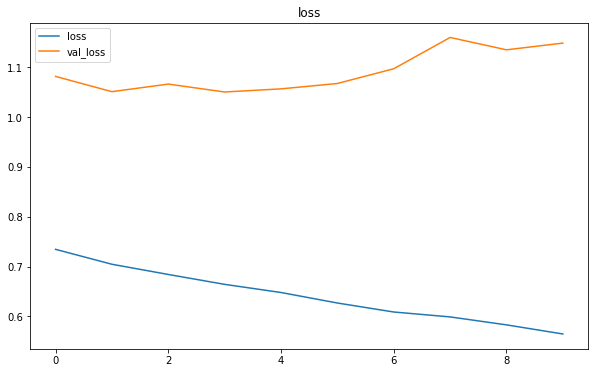

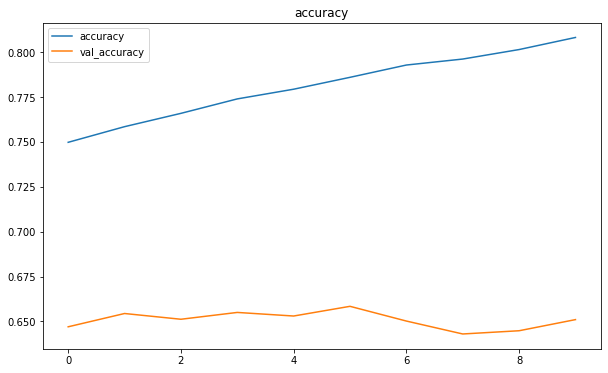

In [11]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

In [14]:
#[TO COMPLETE]
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=[11,11], padding="same", activation="relu", input_shape=[32, 32,3]),
    keras.layers.Conv2D(filters=256, kernel_size=[5,5], padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=384, kernel_size=[3,3], padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=384, kernel_size=[3,3], padding="same", activation="relu"),
    keras.layers.Conv2D(filters=256, kernel_size=[3,3], padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


history = model.fit(X_train, y_train, epochs=15, batch_size=128,
                  validation_data=(X_valid, y_valid))

Epoch 1/15
352/352 [==============================] - 34s 95ms/step - loss: 1.7193 - accuracy: 0.3715 - val_loss: 1.4102 - val_accuracy: 0.4882
Epoch 2/15
352/352 [==============================] - 32s 91ms/step - loss: 1.3266 - accuracy: 0.5184 - val_loss: 1.1377 - val_accuracy: 0.5962
Epoch 3/15
352/352 [==============================] - 32s 91ms/step - loss: 1.1438 - accuracy: 0.5934 - val_loss: 1.0443 - val_accuracy: 0.6378
Epoch 4/15
352/352 [==============================] - 33s 92ms/step - loss: 1.0064 - accuracy: 0.6433 - val_loss: 0.9744 - val_accuracy: 0.6596
Epoch 5/15
352/352 [==============================] - 32s 91ms/step - loss: 0.9107 - accuracy: 0.6788 - val_loss: 0.8910 - val_accuracy: 0.6958
Epoch 6/15
352/352 [==============================] - 32s 92ms/step - loss: 0.8425 - accuracy: 0.7025 - val_loss: 0.8659 - val_accuracy: 0.6914
Epoch 7/15
352/352 [==============================] - 32s 92ms/step - loss: 0.7857 - accuracy: 0.7261 - val_loss: 0.8184 - val_accuracy:

313/313 - 3s - loss: 0.7910 - accuracy: 0.7343 - 3s/epoch - 10ms/step


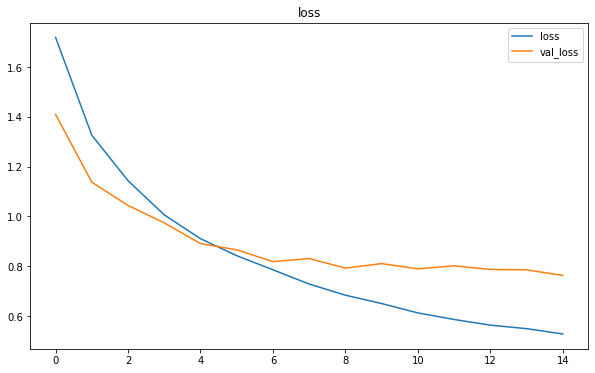

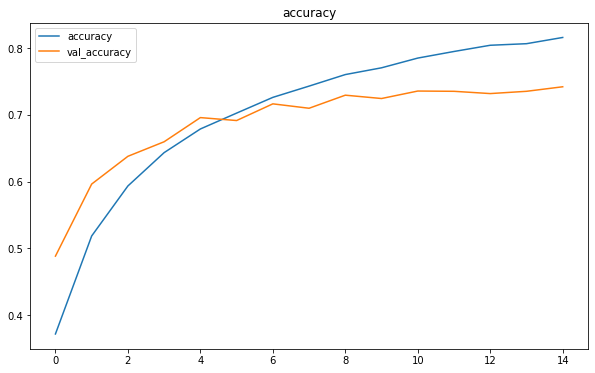

In [15]:
scores = model.evaluate(X_test, y_test, verbose=2)
plot_loss(history)
plot_accuracy(history)

### [TO COMPLETE] Example of tests discussion
The best model that I found was a model that was inspired by AlexNet architucture. I noticed that It is better for this special task to do some simplificaion on AlexNet because our dataset is too small compare to ImageNet so the model was too complex for this data which cause our model to overfit[TO COMPLETE]

The achieved accuracy in the test set is showned on the cell above[TO COMPLETE]

Discussion:
[TO COMPLETE]

People in toronto group found out that using the relu as an activation function accelerated the speed of the training process by almost six times. They also used the dropout layers, that prevented their model from overfitting. Further, the model is trained on the Imagenet dataset. The Imagenet dataset has almost 14 million images across a thousand classes. if you look at the architecture till now, the number of filters is increasing as we are going deeper. Hence it is extracting more features as we move deeper into the architecture. Also, the filter size is reducing, which means the initial filter was larger and as we go ahead the filter size is decreasing, resulting in a decrease in the feature map shape.


Besides, I tested also other models: 
 [TO COMPLETE]
* The exact copy of AlexNet without Dropout layer
* The copy of AlexNet with one less fully connected layer without Dropout layer
* The exact copy of AlexNet with Dropout layer
* increase epoch from 10 to 15

Discussion: When I tried ALexNet with one More fully connected layer I obtained Worse result probably because the volume of dataset is too small and it has been emprically observed that cnns works better only with massive dataset and here it seems that the extra fully connected layer cause the model to overfit in this amount of data. I also added Dropout layer which caused my model to less overfit. Finaly I increased epoch from 10 to 15 because it was not enough to converge to the proper weights.
[TO COMPLETE]